In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(3)

In [82]:
# Function to normalize data
def normalize(data):
    return (data - np.mean(data)) / np.std(data)

In [83]:
# Function to plot the data
def plot_data(X, Y):
    plt.scatter(X, Y)
    plt.xlabel('TV marketing expenses')
    plt.ylabel('Sales')
    plt.title('Sales vs TV marketing expenses')
    plt.show()

In [84]:
# Load and display the dataset
data = pd.read_csv('data/tvmarketing.csv')
print(data.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [85]:
# Extracting the columns
X_orig = data['TV'].values
Y_orig = data['Sales'].values

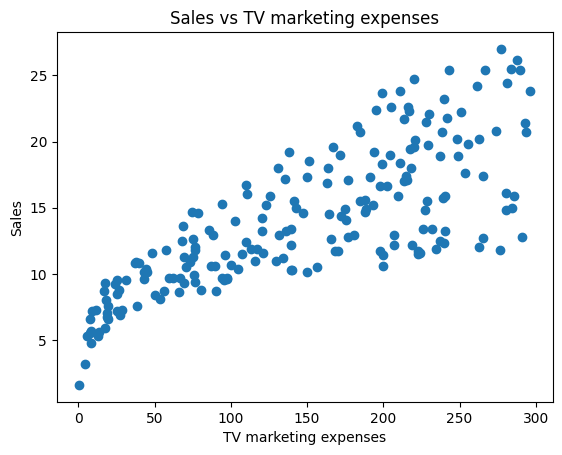

In [86]:
# Plotting the original data
plot_data(X_orig, Y_orig)

In [87]:
# Normalizing the data
X_norm = normalize(X_orig).reshape(1, -1)
Y_norm = normalize(Y_orig).reshape(1, -1)
print ('The shape of X_norm: ' + str(X_norm.shape))
print ('The shape of Y_norm: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[1]))

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)
I have m = 200 training examples!


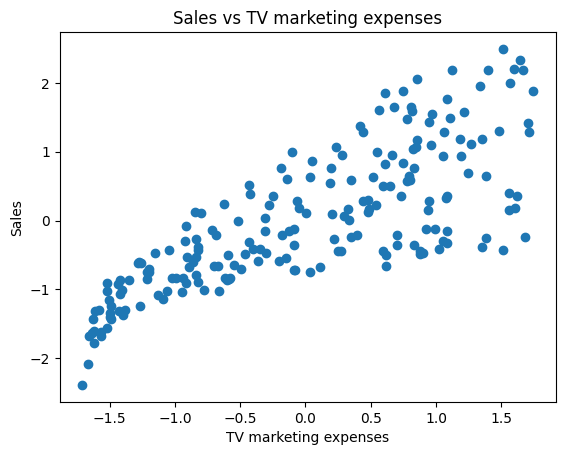

In [88]:
# Plotting the normalized data
plot_data(X_norm.flatten(), Y_norm.flatten())

In [95]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return (n_x, n_y)
(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [96]:
# Function to initialize parameters
def initialize_parameters(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    parameters = {"W": W,
                  "b": b}
    return parameters
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.0043651]]
b = [[0.]]


In [97]:
# Forward propagation
def forward_propagation(X, parameters):
    W = parameters["W"]
    b = parameters["b"]
    Z = np.dot(W, X) + b
    Y_hat = Z
    return Y_hat
Y_hat = forward_propagation(X, parameters)

NameError: name 'X' is not defined

In [93]:
# Compute cost
def compute_cost(Y_hat, Y):
    m = Y.shape[1]
    cost = np.sum((Y_hat - Y)**2) / (2 * m)
    return cost

In [94]:
# Backward propagation
def backward_propagation(Y_hat, X, Y):
    m = X.shape[1]
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)

    grads = {"dW": dW,
             "db": db}
    
    return grads

grads = backward_propagation(Y_hat, X_norm, Y_norm)
print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

NameError: name 'Y_hat' is not defined

In [ ]:
# Update parameters
def update_parameters(parameters, grads, learning_rate):
    W = parameters["W"]
    b = parameters["b"]
    W = W - learning_rate * grads["dW"]
    b = b - learning_rate * grads["db"]
    return {"W": W, "b": b}

In [ ]:
# Neural network model
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    parameters = initialize_parameters(n_x, n_y)
    for i in range(0, num_iterations):
        Y_hat = forward_propagation(X, parameters)
        cost = compute_cost(Y_hat, Y)
        grads = backward_propagation(Y_hat, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    return parameters

In [ ]:
# Train the model
parameters_simple = nn_model(X_norm, Y_norm, num_iterations=30, learning_rate=1.2, print_cost=True)
print("W = " + str(parameters_simple["W"]))
print("b = " + str(parameters_simple["b"]))

In [ ]:
# Predictions
def predict(X, parameters):
    return forward_propagation(X, parameters)

In [ ]:
# Predict sales for new TV marketing expenses
X_new = np.array([50, 120, 280]).reshape(1, -1)
X_new_norm = normalize(X_new)
Y_new_pred = predict(X_new_norm, parameters_simple)
print("TV marketing expenses:", X_new)
print("Predictions of sales:", Y_new_pred)